In [117]:
# -*- coding: UTF-8 -*-
import PySimpleGUI as sg
from selenium import webdriver
import csv
import time
import itertools  
from datetime import datetime
from datetime import timedelta
import openpyxl
import sys
import re
# Waiting
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains


In [118]:
filename="/Users/fanmin/OneDrive/OneDrive - connect.hku.hk/Projects/cov19/version for sharing/Name list for testing/test name list_2FM.csv"
if "csv" in filename:
    with open(r"{}".format(filename), encoding='UTF-8') as f:
        users = []
        names = []
        rows = csv.reader(f,delimiter=",",lineterminator="\n")
        next(rows, None)
        for row in rows:
            user = row[1]
            users.append(user)
            name = row[0]
            names.append(name)

In [106]:
message_head = str("尊敬的 ")
messagesss = str("go")
lenofname = len(names)
t1 = 1

In [119]:
t1 = t1
contatos = users
names = names
mensagem = messagesss
click_number = 0
options = webdriver.ChromeOptions()
options.add_argument('lang=en-US')
options.add_argument('disable-infobars')
options.add_argument('disable-notifications')
options.add_argument('disable-popup-blocking')
prefs = {'profile.default_content_setting_values' :  {  'notifications' : 2  }  }
drivepath = '/Users/fanmin/OneDrive/OneDrive - connect.hku.hk/Projects/cov19/version for sharing/Mac/chromedriver_mac'

options.add_experimental_option("prefs",prefs)
driver = webdriver.Chrome(executable_path = drivepath)
driver.implicitly_wait(20) 
driver.get('https://web.whatsapp.com/')

In [171]:
driver.find_element_by_css_selector("span[class='_39Lm1 _3qSKL']")

'<span aria-label="您："></span><div class="_1bR5a"><div class="copyable-text" data-pre-plain-text="[17:45, 2021年3月20日] Fm: "><div class="_3ExzF"><span dir="ltr" class="_3-8er selectable-text copyable-text"><span>老婆爱你</span></span><span class="_1Bd9o _2ScdV"></span></div></div><div class="_2zWo9"><div class="UFTvj" role="button"><span class="_17Osw" dir="auto">17:45</span><div class="_2nWgr"><span data-testid="msg-dblcheck" aria-label=" 已递送 " data-icon="msg-dblcheck" class=""><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 16 15" width="16" height="15"><path fill="currentColor" d="M15.01 3.316l-.478-.372a.365.365 0 0 0-.51.063L8.666 9.879a.32.32 0 0 1-.484.033l-.358-.325a.319.319 0 0 0-.484.032l-.378.483a.418.418 0 0 0 .036.541l1.32 1.266c.143.14.361.125.484-.033l6.272-8.048a.366.366 0 0 0-.064-.512zm-4.1 0l-.478-.372a.365.365 0 0 0-.51.063L4.566 9.879a.32.32 0 0 1-.484.033L1.891 7.769a.366.366 0 0 0-.515.006l-.423.433a.364.364 0 0 0 .006.514l3.258 3.185c.143.14.361.125.484-.033l6.2

In [120]:
wait = WebDriverWait(driver, 30 ,1) # Set a waiting time of 30 seconds for elements loading
success_phone_number = "85259332417"
success_name = 'FM'
test = "我是FM，忽略我，做测试,请勿回复，thanks"
click_number = 1
for i in [1]:
    # Keep a record for those successful name and number
    try:
        link = 'https://web.whatsapp.com/send?phone='+success_phone_number+'&text='+test
        driver.get(link)
        driver.execute_script("window.onunload=null; window.onbeforeunload=null")
        wait.until(EC.presence_of_element_located((By.CLASS_NAME, "_3QfZd"))) # until the page finished loading
        time.sleep(1)
        chat_box = wait.until(EC.presence_of_element_located((By.CLASS_NAME, '_1E0Oz'))) # until the chat box is loaded
        time.sleep(1) 
        chat_box.click() # click the send button 
        time.sleep(1)
        elements_for_last_msg = "div[class='_11liR'] div[class*='GDTQm'][class*='message-out'] div[class='UFTvj'] span[class='_17Osw']" # get the time of last msg 
        if len(elements_for_last_msg)>0 :
            time_for_last_msg = str(driver.find_elements_by_css_selector(elements_for_last_msg)[-1].get_attribute("innerHTML"))
            send_time = datetime.strptime(time_for_last_msg,"%H:%M")
            time_margin = timedelta(minutes = 1)
            present_time = datetime.strptime(datetime.now().strftime("%H:%M"),"%H:%M") # The current time 
            # if the sending time for last msg is not far from the current time, means the msg has been successful sent.
            if present_time - time_margin <= send_time <= present_time + time_margin:
                click_number = click_number + 1
                success_phone_number = success_phone_number.append(contato)
                success_name = success_name.append(name)
                break
        else:
            break
    except:
        continue 
    print(success_name)

In [108]:

elements_for_last_msg = "div[class='_11liR'] div[class*='GDTQm'][class*='message-out'] div[class='UFTvj'] span[class='_17Osw']"
# get the time of last msg 
time_in_page =str(driver.find_elements_by_css_selector(elements_for_last_msg)[-1].get_attribute('innerHTML'))
if bool(re.search('下午|PM|晚上|pm',time_in_page)):
    time_in_page_remove_original_AMPM = ''.join(list(filter(lambda ch: ch in '0123456789:', time_in_page))) + " PM"
    time_in_page_formatted = datetime.strptime(time_in_page_remove_original_AMPM,"%I:%M %p")
elif bool(re.search('上午|AM|am',time_in_page)):
    time_in_page_remove_original_AMPM = ''.join(list(filter(lambda ch: ch in '0123456789:', time_in_page))) + " AM"
    time_in_page_formatted = datetime.strptime(time_in_page_remove_original_AMPM,"%I:%M %p")
else:
    time_in_page_formatted = datetime.strptime(time_in_page,"%H:%M")
send_time = time_in_page_formatted
time_margin = timedelta(minutes = 1)
present_time = datetime.strptime(datetime.now().strftime("%H:%M"),"%H:%M") # The current time 
# if the sending time for last msg is not far from the current time, means the msg has been successful sent.
if present_time - time_margin <= send_time <= present_time + time_margin:
    #should_restart = False
    click_number = click_number + 1
    
print(send_time)
print(present_time)


1900-01-01 12:27:00
1900-01-01 12:28:00


In [123]:
print(present_time)

1900-01-01 12:28:00


In [121]:
print(click_number)

1


In [109]:
users= ['85259332417']
names = ['fm']
messagesss='fsdfdf'
lenofname = len(names)
def main():
    class WhatsappBot:
        def __init__(self):
            self.t1 = t1
#            self.t2 = t2
#            self.t2 = t2
            self.contatos = users
            self.names = names
            self.mensagem = messagesss
            self.click_number = 0
            options = webdriver.ChromeOptions()
            options.add_argument('lang=en-US')
            options.add_argument('disable-infobars');
            options.add_argument("disable-notifications");
            options.add_argument("disable-popup-blocking");
            prefs = {'profile.default_content_setting_values' :  {  'notifications' : 2  }  }
            options.add_experimental_option("prefs",prefs)
            self.driver = webdriver.Chrome(executable_path = drivepath)
            self.driver.implicitly_wait(30) 
        def SendMessages(self):
            wait = WebDriverWait(self.driver, 30 ,1) # Set a waiting time of 30 seconds for elements loading
#            self.driver.get('https://web.whatsapp.com/') # Get into the wtsapp login-in page 
            time.sleep(t1)
            success_phone_number = list() 
            success_name = list()
            for (contato,name) in itertools.zip_longest(self.contatos,self.names): # loop the name number
                #should_restart = True # Set a indicator of fail sending 
                # Keep a record for those successful name and number
                #while should_restart: # If fail sending, the sending process will be restarted
                try:
                    link = 'https://web.whatsapp.com/send?phone='+ contato + '&text=' + message_head +name + " "+ self.mensagem
                    self.driver.get(link)
                    self.driver.execute_script("window.onunload=null; window.onbeforeunload=null")
                    wait.until(EC.presence_of_element_located((By.CLASS_NAME, "_3QfZd"))) # until the page finished loading
                    time.sleep(1)
                    chat_box = wait.until(EC.presence_of_element_located((By.CLASS_NAME, '_1E0Oz'))) # until the chat box is loaded
                    time.sleep(1) 
                    chat_box.click() # click the send button 
                    time.sleep(1)
                    elements_for_last_msg = "div[class='_11liR'] div[class*='GDTQm'][class*='message-out'] div[class='UFTvj'] span[class='_17Osw']" # get the time of last msg 
                    if len(elements_for_last_msg)>0:
                        # get the time of last msg 
                        time_in_page =str(self.driver.find_elements_by_css_selector(elements_for_last_msg)[-1].get_attribute('innerHTML'))
                        if bool(re.search('下午|PM|晚上|pm',time_in_page)):
                            time_in_page_remove_original_AMPM = ''.join(list(filter(lambda ch: ch in '0123456789:', time_in_page))) + " PM"
                            time_in_page_formatted = datetime.strptime(time_in_page_remove_original_AMPM,"%I:%M %p")
                        elif bool(re.search('上午|AM|中午|am',time_in_page)):
                            time_in_page_remove_original_AMPM = ''.join(list(filter(lambda ch: ch in '0123456789:', time_in_page))) + " AM"
                            time_in_page_formatted = datetime.strptime(time_in_page_remove_original_AMPM,"%I:%M %p")
                        else:
                            time_in_page_formatted = datetime.strptime(time_in_page,"%H:%M")
                        send_time = time_in_page_formatted
                        time_margin = timedelta(minutes = 1)
                        present_time = datetime.strptime(datetime.now().strftime("%H:%M"),"%H:%M") # The current time 
                        # if the sending time for last msg is not far from the current time, means the msg has been successful sent.
                        print(present_time)
                        print(present_time)
                        if present_time - time_margin <= send_time <= present_time + time_margin:
                            #should_restart = False
                            self.click_number = self.click_number + 1
                            success_phone_number.append(contato)
                            success_name.append(name)
                        else:
                            next
                    else:
                        next
                except:
                    continue 
            self.driver.quit()
            fail_names = [x for x in self.names if x not in success_name]
            if len(fail_names)>0:
                warning_after_finish = "\n"+str(self.click_number)+"/"+str(lenofname)+" message has been sent. \nPls check the following msg:\n"+','.join(fail_names)+"\n\n"
                sg.Popup(warning_after_finish,title='')
            else:
                warning_after_finish = "\nThe message sending is finished.\n"+str(self.click_number)+"/"+str(lenofname)+" message has been sent.\n\n"
                sg.Popup(warning_after_finish)
            message_hint = window['-OUTPUT-'].get() + "\n"
            message_hint = str(datetime.now().strftime("%d/%m/%Y %H:%M:%S"))+warning_after_finish+ message_hint
            window['-OUTPUT-'].update(message_hint)
  #  try:
    bot = WhatsappBot()
    bot.SendMessages()
main()

1900-01-01 12:29:00
1900-01-01 12:29:00


NameError: name 'window' is not defined

In [113]:
datetime.strptime(''.join(list(filter(lambda ch: ch in '0123456789:', time_in_page))) + " PM","%I:%M %p")

datetime.datetime(1900, 1, 1, 12, 27)

In [116]:
present_time - time_margin <= send_time <= present_time + time_margin

True

In [181]:
driver.find_elements_by_css_selector(elements_for_last_msg)[-1]

<selenium.webdriver.remote.webelement.WebElement (session="7f2ecfc895738132cc313f098ad9a178", element="97804ef3-0a6a-4df4-9189-93888d3e9dac")>

19

In [24]:
str(driver.find_elements_by_css_selector(elements_for_last_msg)[0].get_attribute("innerHTML"))

IndexError: list index out of range

In [80]:
def main():
    class WhatsappBot:
        def __init__(self):
            self.t1 = t1
            self.contatos = users
            self.names = names
            self.mensagem = messagesss
            self.click_number = 0
            options = webdriver.ChromeOptions()
            options.add_argument('lang=en-US')
            options.add_argument('disable-infobars')
            options.add_argument("disable-notifications")
            options.add_argument("disable-popup-blocking")
            prefs = {'profile.default_content_setting_values' :  {  'notifications' : 2  }  }
            options.add_experimental_option("prefs",prefs)
            self.driver = webdriver.Chrome(executable_path = drivepath)
            self.driver.implicitly_wait(20) 
        def SendMessages(self):
            wait = WebDriverWait(self.driver, 15 ,1)
            self.driver.get('https://web.whatsapp.com/')
            time.sleep(t1)
            for (contato,name) in itertools.zip_longest(self.contatos,self.names):
                should_restart = True
                while should_restart:
                    should_restart= False
                    try:
                        link = 'https://web.whatsapp.com/send?phone='+ contato + '&text=' + message_head +name + " "+ self.mensagem
                        self.driver.get(link)
                        self.driver.execute_script("window.onunload=null; window.onbeforeunload=null")
                        wait.until(EC.presence_of_element_located((By.CLASS_NAME, "_3QfZd")))
                        time.sleep(1)
                        chat_box = wait.until(EC.presence_of_element_located((By.CLASS_NAME, '_1E0Oz')))
                        time.sleep(1) 
                        chat_box.click()
                        send_time = str(driver.find_elements_by_css_selector("div[class='_11liR'] div[class~='GDTQm']:last-of-type div[class='UFTvj'] span[class='_17Osw']")[0].get_attribute("innerHTML"))
                        if str(datetime.now().strftime("%H:%M")) == send_time:
                            should_restart = True
                            self.click_number = self.click_number + 1
                            time.sleep(1)
                            break
                    except:
                        pass 
            self.driver.quit()
  #  try:
    bot = WhatsappBot()
    bot.SendMessages()

'18:41'

In [ ]:
def main():
    class WhatsappBot:
        def __init__(self):
            self.test=1
        def SendMessages(self):
            try:
                for i in (1,2,3,4):
                    str(driver.find_elements_by_css_selector("div[class='_11liR'] div[class~='GDTQm']:last-of-type div[class='UFTvj'] span[class='_17Osw']")[0].get_attribute("innerHTML"))
                    self.test = self.test+2
            except:
                pass
            print(self.test)
    bot = WhatsappBot()
    bot.SendMessages()

main()

In [ ]:
main()

19:39
19:39
1


In [52]:
message_head = str("尊敬的 ")
messagesss = str("go")
lenofname = len(names)
t1 = 10
drivepath = '/Users/fanmin/OneDrive/OneDrive - connect.hku.hk/Projects/cov19/version for sharing/Mac/chromedriver_mac'
main()

In [1]:
import time

from selenium import webdriver

from simon.accounts.pages import LoginPage
from simon.chat.pages import ChatPage
from simon.chats.pages import PanePage
from simon.header.pages import HeaderPage

from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

options = webdriver.ChromeOptions()

options.add_argument('lang=en-US')
options.add_argument('disable-infobars')
options.add_argument("disable-notifications")
options.add_argument("disable-popup-blocking")
prefs = {'profile.default_content_setting_values' :  {  'notifications' : 2  }  }
options.add_experimental_option("prefs",prefs)

# Creating the driver (browser)
driver = webdriver.Chrome('/Users/fanmin/OneDrive/OneDrive - connect.hku.hk/Projects/cov19/version for sharing/Mac/chromedriver_mac')
driver.maximize_window()

# Login
#       and uncheck the remember check box
#       (Get your phone ready to read the QR code)
login_page = LoginPage(driver)
login_page.load()
time.sleep(7)


In [2]:
inp_xpath_search = "//div[text()='Search or start new chat']"
inp_xpath_search_cn = "//div[class= '_2_1wd copyable-text selectable-tex' ]"
input_box_search = WebDriverWait(driver,50).until(lambda driver: driver.find_element_by_xpath(inp_xpath_search_cn))
input_box_search.click()
time.sleep(2)


TimeoutException: Message: 


In [302]:
element = driver.find_elements_by_css_selector("div[class='_1JAUF _1d1OL'] div[class~='_2_1wd']")
my_desired_number = "59332417"
driver.execute_script("arguments[0].innerText = "+my_desired_number, element[0])
width,height = pg.size()
pg.click(width/2,height/2)
time.sleep(20-2)
pg.press('enter')


In [312]:

wait.until(EC.presence_of_element_located((By.CLASS_NAME, '_1E0Oz')))

<selenium.webdriver.remote.webelement.WebElement (session="7f06e0e1e20ab70c44be3ff95e8ab8c8", element="57d4daa1-12d6-4f08-847f-b72b2712306a")>

In [21]:
wait = WebDriverWait(driver, 15 ,1)
for i in [1,2,3,4]:
    link = 'https://web.whatsapp.com/send?phone=85259332407&text='+str(i)
    driver.get(link)
    driver.execute_script("window.onunload=null; window.onbeforeunload=null")
    wait.until(EC.presence_of_element_located((By.CLASS_NAME, "_3QfZd")))
    print("yes")
    time.sleep(2)

yes
yes
yes
yes


In [235]:
driver.find_element_by_class_name('_1Ek-U').click()

element = driver.find_elements_by_css_selector("div[~='class_2_1wd copyable-text selectable-text']")
element.click()

driver.execute_script("arguments[0].innerHTML = 'test'", element)

AttributeError: 'list' object has no attribute 'click'

In [232]:
inp_xpath = '//div[@class="_2_1wd copyable-text selectable-text"][@dir="ltr"][@data-tab="2"]'
input_box = WebDriverWait(driver, 20, 0.5).until(EC.presence_of_element_located((By.XPATH, inp_xpath))) 

TimeoutException: Message: 


In [ ]:
input_box.send_keys("85259332417") 

In [165]:
link = 'https://web.whatsapp.com/send?phone=85259332407&text=test'
driver.get(link)
driver.execute_script("window.onunload=null; window.onbeforeunload=null")
time.sleep(2)
WebDriverWait(driver, 20, 0.5).until(EC.presence_of_element_located((By.CLASS_NAME, '_1E0Oz'))) 
chat_box = driver.find_element_by_class_name('_1E0Oz')
chat_box.click()
test = driver.find_elements_by_css_selector("div[class='_11liR'] div[class~='GDTQm']:last-of-type div[class='_2nWgr'] span")
test = driver.find_elements_by_css_selector("div[class='_11liR'] div[class~='GDTQm']:last-of-type div[class='UFTvj'] span")
status = str(test[0].get_attribute("aria-label").strip())
#test1 = test[0].find_elements_by_css_selector("span[class~='_1RD_6']")
if status in ["等待中","已读取"]:
    print("OK")

WebDriverException: Message: chrome not reachable
  (Session info: chrome=89.0.4389.82)


In [131]:
test[0].get_attribute("aria-label")

' 已读取 '

'00:03'

False

In [170]:
[i.get_attribute("aria-label") for i in driver.find_elements_by_css_selector("div[class='_2zWo9'] div[class='UFTvj'] div[class='_2nWgr'] span")][temp_list.index(time_of_click)]

NameError: name 'time_of_click' is not defined

In [191]:
all_notification_new =driver.find_elements_by_css_selector("div[class='TbtXF'] div[class='_2pkLM'] div[class='_3Dr46'] span[dir='auto']")
[i.get_attribute("innerHTML") for i in all_notification_new]

['Vivien',
 '+852 9450 6729',
 'Miriam',
 '廣州醫科大學香港校友會',
 '渣烦',
 '烦死人他娘烦死你他妈',
 'CSMPR current ',
 'CARE part 4',
 'Ocean park ',
 'CARE4 recruitment buddy',
 'Lauren ',
 'Renovation HKU',
 'Edward Chen',
 'YAN Vincent',
 'Head',
 '高乐',
 'Jorden',
 'Edmund']

In [192]:
all_notification_new =driver.find_elements_by_css_selector("div[class='TbtXF'] div[class='_1SjZ2'] div[class='_15smv']")
["New" if len(i.find_elements_by_css_selector("span[class='_38M1B']"))>0 else "No"  for i in all_notification_new]

['No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No']

In [193]:
temp_list = [i.get_attribute("innerHTML") for i in driver.find_elements_by_css_selector("div[class='_2zWo9'] div[class='UFTvj'] span[class='_17Osw']")]


In [172]:
[i.get_attribute("innerHTML") for i in driver.find_elements_by_css_selector("div[class='_2zWo9'] div[class='UFTvj'] div[class='_17Osw'] span")]

[]

In [154]:
[i.get_attribute("aria-label") for i in driver.find_elements_by_css_selector("div[class='_2zWo9'] div[class='UFTvj'] div[class='_2nWgr'] span")][temp_list.index(time_of_click)]

[' 已递送 ',
 ' 已递送 ',
 ' 已递送 ',
 ' 已递送 ',
 ' 已递送 ',
 ' 已递送 ',
 ' 已递送 ',
 ' 已递送 ',
 ' 已递送 ']

In [14]:
test = driver.find_elements_by_class_name("_1RD_6")

In [197]:

contacts  = driver.find_elements_by_css_selector("div[class='_2aBzC']")
for contact in contacts:
    contact.click()
    msg_all = driver.find_element_by_css_selector("div[class='_11liR']")
    msg = msg_all.find_elements_by_css_selector("div[class='_3ExzF'] span[dir='ltr'] span")
    print([i.get_attribute('innerHTML') for i in msg][-1])
    print('\n')

haha


23 missed


<a href="https://www.qualtrics.com/support/survey-platform/survey-module/survey-checker/common-user-mistakes/" title="https://www.qualtrics.com/support/survey-platform/survey-module/survey-checker/common-user-mistakes/" target="_blank" rel="noopener noreferrer" class="_3-8er selectable-text copyable-text">https://www.qualtrics.com/support/survey-platform/survey-module/survey-checker/common-user-mistakes/</a>


楊会您忙，与一些校友又在第一線工作，我閒置，整理些資料，有對比地讓大家参考一下


f


发一个给我


no, i will think other possible methods. In the meanwhile, i am trying to extract those reply msg for you guys. do u think that can save your time?


who has lab coat n lanyard with u now?


going up?


This is our updated schedule, can you please fill in your time slot below please? Thank you very much. (Aiming one time slot for each of us every week, rotation for this week: FM, Grace, Kailin, Miriam, Vanessa, Vincent, Vivien
<strong class="_3-8er selectable-text copyable-text" data-app-text-template="*${ap

In [74]:
msg

<selenium.webdriver.remote.webelement.WebElement (session="843a8fa4f38de5cfec0b7a61b9adba05", element="0153ce57-06ba-493d-9636-73ca981cbdca")>

In [55]:
test

[<selenium.webdriver.remote.webelement.WebElement (session="843a8fa4f38de5cfec0b7a61b9adba05", element="975794d0-ddde-4135-be1f-4dcc7fb72c8a")>]

v class="_2xq9W"><span data-testid="forwarded" data-icon="forwarded" class="Sqh9W _2nw-x"><svg width="16" height="16" viewBox="0 0 16 16" xmlns="http://www.w3.org/2000/svg"><path d="M9.519 3.875a.54.54 0 0 1 .922-.382l4.03 4.034a.54.54 0 0 1 0 .764l-4.03 4.034a.54.54 0 0 1-.922-.383v-1.821c-3.398 0-5.886.97-7.736 3.074-.164.186-.468.028-.402-.211.954-3.449 3.284-6.67 8.138-7.363V3.875z" fill="currentColor"></path></svg></span><span class="_3SReC">已转发</span></div><div class="JtB6T copyable-text" data-pre-plain-text="[10:38, 2021年2月4日] Fm: "><div class="_3ExzF"><span dir="ltr" class="_3-8er selectable-text copyable-text"><span>adjust panel</span></span><span class="_1Bd9o _2ScdV"></span></div></div><div class="_2zWo9"><div class="UFTvj" role="button"><span class="_17Osw" dir="auto">10:38</span><div class="_2nWgr"><span data-testid="msg-dblcheck" aria-label=" 已递送 " data-icon="msg-dblcheck" class=""><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 16 15" width="16" height="15"><path fi
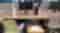

In [56]:
test[0].get_attribute('innerHTML')

In [39]:
for item in test:
    print(item.find_element_by_tag_name("span").get_attribute('innerHTML'))

<svg id="ee51d023-7db6-4950-baf7-c34874b80976" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" width="24" height="24"><path fill="currentColor" d="M12 20.664a9.163 9.163 0 0 1-6.521-2.702.977.977 0 0 1 1.381-1.381 7.269 7.269 0 0 0 10.024.244.977.977 0 0 1 1.313 1.445A9.192 9.192 0 0 1 12 20.664zm7.965-6.112a.977.977 0 0 1-.944-1.229 7.26 7.26 0 0 0-4.8-8.804.977.977 0 0 1 .594-1.86 9.212 9.212 0 0 1 6.092 11.169.976.976 0 0 1-.942.724zm-16.025-.39a.977.977 0 0 1-.953-.769 9.21 9.21 0 0 1 6.626-10.86.975.975 0 1 1 .52 1.882l-.015.004a7.259 7.259 0 0 0-5.223 8.558.978.978 0 0 1-.955 1.185z"></path></svg>
<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" width="24" height="24"><path fill="currentColor" d="M19.005 3.175H4.674C3.642 3.175 3 3.789 3 4.821V21.02l3.544-3.514h12.461c1.033 0 2.064-1.06 2.064-2.093V4.821c-.001-1.032-1.032-1.646-2.064-1.646zm-4.989 9.869H7.041V11.1h6.975v1.944zm3-4H7.041V7.1h9.975v1.944z"></path></svg>
<svg xmlns="http://www.w3.org/2000/svg" view

In [ ]:
a =[1,2,3,5]
b =[1,2]

[x for x in a if ]

In [1]:
import random
random.uniform(0, 1)

0.4678667180613394

In [15]:
for i in range(1, 10): # loop the name number
    should_restart = True # Set a indicator of fail sending 
    # Keep a record for those successful name and number
    while should_restart: # If fail sending, the sending process will be restarted
        try:
            print(i)
            temp_random = random.uniform(0,1)
            print(temp_random)
            if temp_random <=0.5:
                should_restart = False
                print("good")
                break
        except:
            continue

1
0.7991772281438877
1
0.03633175941870681
good
2
0.33641952476591075
good
3
0.44987516335433764
good
4
0.14753637871780345
good
5
0.552995179000522
5
0.8620715362645401
5
0.5848071542559324
5
0.593959060897757
5
0.826111290790931
5
0.2320411923696052
good
6
0.818682453581874
6
0.7873168278617253
6
0.930500889859934
6
0.6923411368575477
6
0.3889525842931898
good
7
0.7201626204947926
7
0.14410842167159787
good
8
0.6195821742652584
8
0.015153566820885533
good
9
0.16608284205481905
good


In [31]:
for i in range(1,10):
    try:
        if i > 5:
            print(i)
        else:
            next
    except:
        continous

6
7
8
9
